In [150]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

In [151]:
## base_vgs_df ==== Base Video Game Sales DataFrame

base_vgs_df = pd.read_csv('../VideoGameSalesProject2021/Video_Games_Sales_as_at_22_Dec_2016.csv')

base_vgs_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
## create general platform column

base_vgs_df['General_Platform']= base_vgs_df['Platform']

base_vgs_df.loc[base_vgs_df['Platform'] == 'PS3', 'General_Platform'] = 'Sony_Playstation' 
base_vgs_df.loc[base_vgs_df['Platform'] == 'PS', 'General_Platform'] = 'Sony_Playstation' 
base_vgs_df.loc[base_vgs_df['Platform'] == 'PS2', 'General_Platform'] = 'Sony_Playstation'
base_vgs_df.loc[base_vgs_df['Platform'] == 'PS4', 'General_Platform'] = 'Sony_Playstation'
base_vgs_df.loc[base_vgs_df['Platform'] == 'PSP', 'General_Platform'] = 'Sony_Playstation'
base_vgs_df.loc[base_vgs_df['Platform'] == 'PSV', 'General_Platform'] = 'Sony_Playstation'
base_vgs_df.loc[base_vgs_df['Platform'] == 'Wii', 'General_Platform'] = 'Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == 'DS', 'General_Platform'] = 'Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == 'GBA', 'General_Platform'] = 'Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == '3DS', 'General_Platform'] = 'Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == 'WiiU', 'General_Platform'] = 'Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == 'NES', 'General_Platform'] = 'Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == 'SNES', 'General_Platform'] = 'Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == 'N64', 'General_Platform'] = 'Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == 'GB', 'General_Platform'] = 'Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == 'GC', 'General_Platform'] = 'Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == 'X360', 'General_Platform'] = 'Microsoft_Xbox'
base_vgs_df.loc[base_vgs_df['Platform'] == 'XB', 'General_Platform'] = 'Microsoft_Xbox'
base_vgs_df.loc[base_vgs_df['Platform'] == 'XOne', 'General_Platform'] = 'Microsoft_Xbox'
base_vgs_df.loc[base_vgs_df['Platform'] == '2600', 'General_Platform'] = 'Atari'
base_vgs_df.loc[base_vgs_df['Platform'] == 'DC', 'General_Platform'] = 'Sega'
base_vgs_df.loc[base_vgs_df['Platform'] == 'SAT', 'General_Platform'] = 'Sega'
base_vgs_df.loc[base_vgs_df['Platform'] == 'GG', 'General_Platform'] = 'Sega'
base_vgs_df.loc[base_vgs_df['Platform'] == 'WS', 'General_Platform'] = 'Bandal'
base_vgs_df.loc[base_vgs_df['Platform'] == 'TG16', 'General_Platform'] = 'Nec'
base_vgs_df.loc[base_vgs_df['Platform'] == 'PCFX', 'General_Platform'] = 'Nec'
base_vgs_df.loc[base_vgs_df['Platform'] == '3DO', 'General_Platform'] = 'Panasonic'
base_vgs_df["General_Platform"].unique()

array(['Nintendo', 'Microsoft_Xbox', 'Sony_Playstation', 'PC', 'Atari',
       'GEN', 'Sega', 'SCD', 'Bandal', 'NG', 'Nec', 'Panasonic'],
      dtype=object)

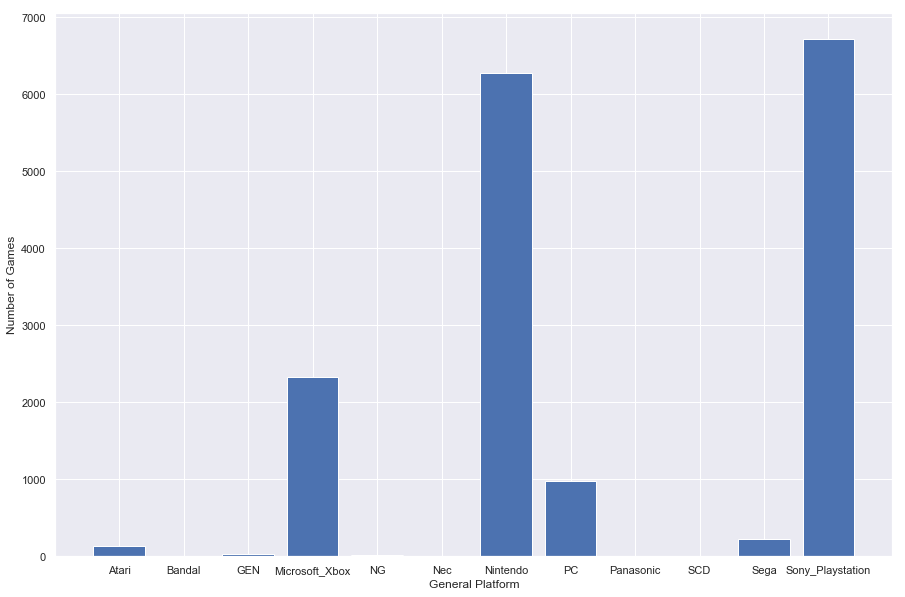

In [199]:
## check number of games for each platform

platform_nums = base_vgs_df.pivot_table(index=['General_Platform'], aggfunc='size')

plt.figure(figsize=(15,10))

plt.bar(x = platform_nums.index, height = platform_nums)
plt.xlabel('General Platform')
plt.ylabel('Number of Games')
plt.show()

In [154]:
## checking for missing values
base_vgs_df.isnull().sum()

Name                   2
Platform               0
Year_of_Release      269
Genre                  2
Publisher             54
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score        8582
Critic_Count        8582
User_Score          9129
User_Count          9129
Developer           6623
Rating              6769
General_Platform       0
dtype: int64

In [175]:
## std_vgs_df ==== Standard Video Game Sales DataFrame 
## removed following columns (Critic_Score, Critic_Count,User_Score,User_Count,Developer,Rating)

std_vgs_df = base_vgs_df.dropna(axis=1, thresh = 16000).dropna().reset_index(drop = True).astype({'Year_of_Release': 'int32'})

std_vgs_df.head()

#std_vgs_df.dtypes

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,General_Platform
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo


In [176]:
train_std, test_std = train_test_split(std_vgs_df, test_size=0.2)

std_vgs_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


In [157]:
## noNA_vgs_df ==== Video Game Sales DataFrame with ALL ROWS WITH NA VALUES REMOVED

noNA_vgs_df = base_vgs_df.dropna().reset_index(drop = True).astype({'Year_of_Release': 'int32'})
noNA_vgs_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,General_Platform
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Nintendo
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Nintendo
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Nintendo
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,Nintendo
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Nintendo


In [158]:
noNA_vgs_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


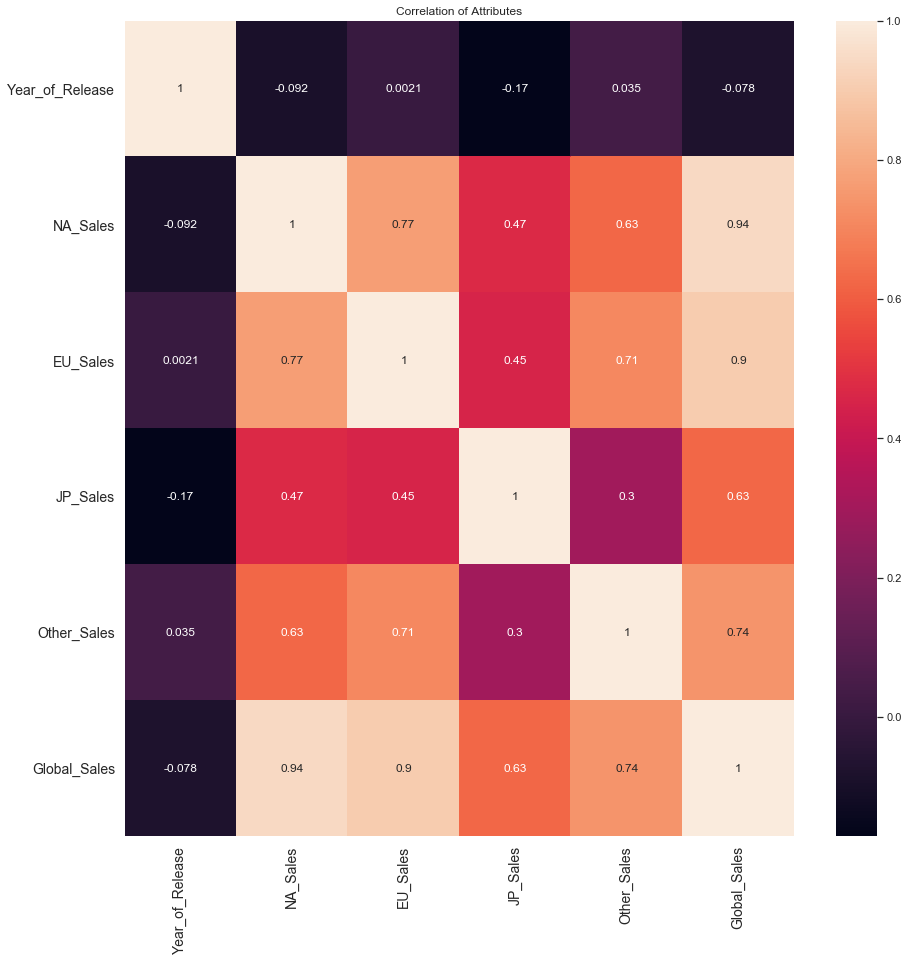

In [174]:
sb.heatmap(train_std.corr(), annot=True).set_title("Correlation of Attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()